# Apprentice_Chef_Data_Dictionary

A2: Regression Model Development,

Name : Piyush Kumar,

Due Date: Feb 19


# Introduction
In this code, we will be analyzing the Apprentice Chef dataset using several regression algorithms from scikit-learn. The dataset contains information on customers of a meal kit delivery company, including demographic data, cooking behaviours, and order information. Our goal is to predict the revenue generated from each customer's first year of orders.

Libraries:

We will be using several Python libraries to analyze the data and build our models. The libraries that we will be using are:
•	Pandas for data manipulation and analysis
•	NumPy for mathematical calculations
•	Scikit-learn for machine learning algorithms and data pre-processing

Data:

The dataset used in this code can be found in the 'Apprentice_Chef_Dataset_2023.xlsx' file. It contains 1946 observations and 28 variables. We will use the data to build several regression models that predict revenue generated from a customer's first year of orders.

Models:

We will use four different regression models to predict revenue. The models that we will use are:
•	Ols Regression
•	Lasso Regression
•	Automatic Relevance Determination Regression (ARD)
•	K-Nearest Neighbors Regression (KNN)
•	Pruned Random Forest Regression

Data Pre-processing:

We will preprocess the data using scikit-learn's StandardScaler. This will scale the data so that each variable has a mean of 0 and a standard deviation of 1. We will also split the data into training and testing sets using scikit-learn's train_test_split function. This will allow us to evaluate our models on unseen data.





In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# Load the dataset
df = pd.read_excel('Apprentice_Chef_Dataset_2023.xlsx')
df.columns = df.columns.str.strip()


In [33]:
# Getting first 10 rows
df.head(10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


In [34]:
# Getting last 10 rows
df.tail(10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
1936,2800.000,Clifford Conklyn,clifford.conklyn@passport.com,Clifford,Conklyn,64,5,11,1,168.7,1,5,1,4,0,48.0,5,2.894737,9
1937,2712.500,Kirth Vance,kirth.vance@gmail.com,Kirth,Vance,70,4,12,7,143.6,2,5,2,9,0,59.0,6,2.894737,18
1938,2850.750,Lister,lister@gmail.com,Lister,Lister,65,4,12,8,157.3,2,6,2,13,0,38.0,6,2.894737,18
1939,2852.500,Olyvar Frey,olyvar.frey@gmail.com,Olyvar,Frey,110,7,12,3,104.0,0,6,1,10,0,48.0,4,2.894737,6
1940,5722.500,Sebaston Farman,sebaston.farman@cisco.com,Sebaston,Farman,57,7,12,1,223.2,2,6,2,0,0,52.0,6,2.894737,372
1941,2940.000,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,89,6,13,3,143.0,1,5,2,8,0,53.0,5,2.894737,16
1942,7087.500,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.0,5,2.631579,302
1943,6562.500,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.0,6,2.631579,310
1944,5355.000,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.0,6,2.631579,275
1945,5194.875,Anguy,anguy@boeing.com,Anguy,Anguy,96,7,19,10,168.9,2,6,2,0,0,47.0,5,2.368421,5


In [35]:
# Checking the duplicate entries
df.duplicated().sum()

0

In [36]:
# finding the null values
df.isnull().sum()

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [37]:
# finding the data type to correct missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

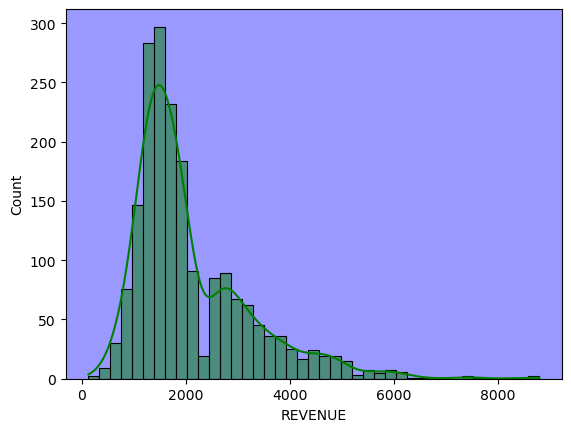

In [38]:
# creating the histoplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['REVENUE'], kde=True, color="green")
ax = plt.gca()
ax.set_facecolor('#9999FF')
plt.show()

<AxesSubplot:>

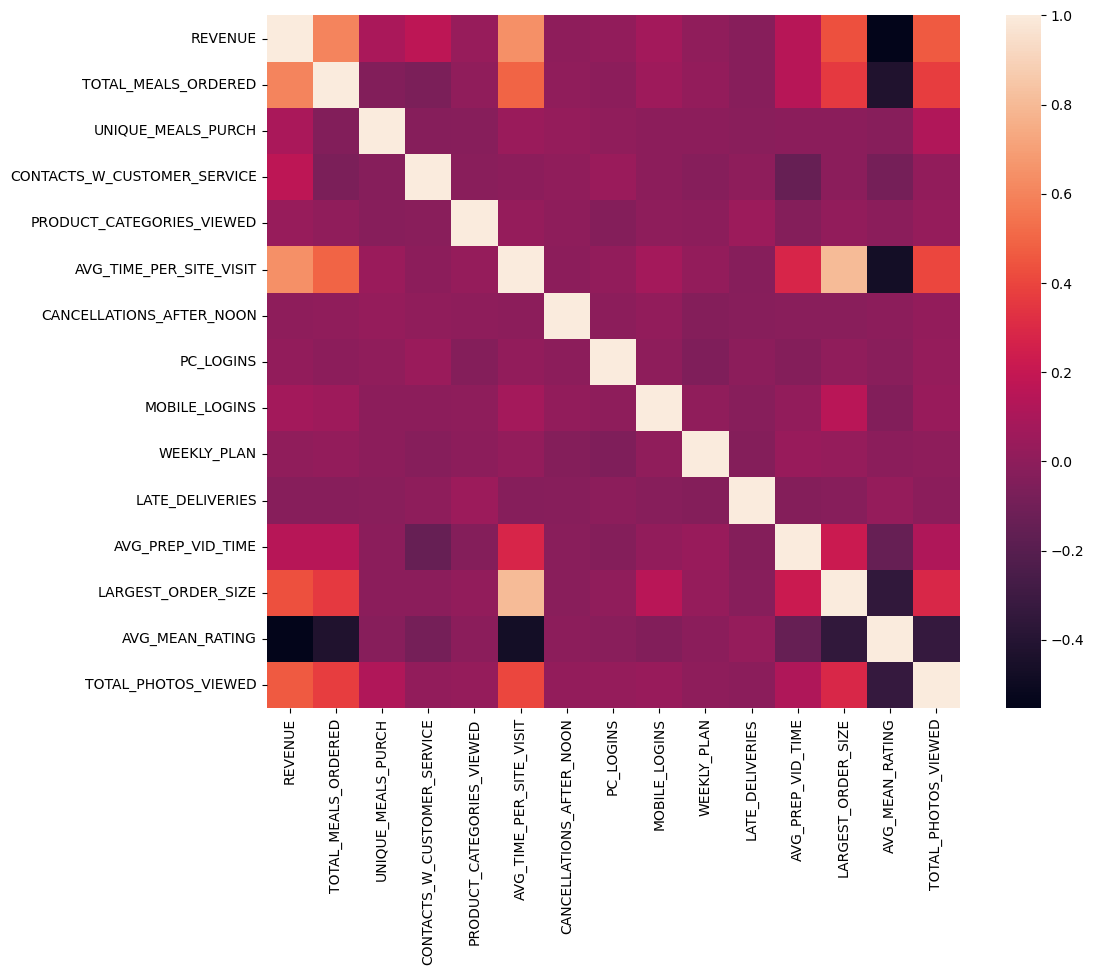

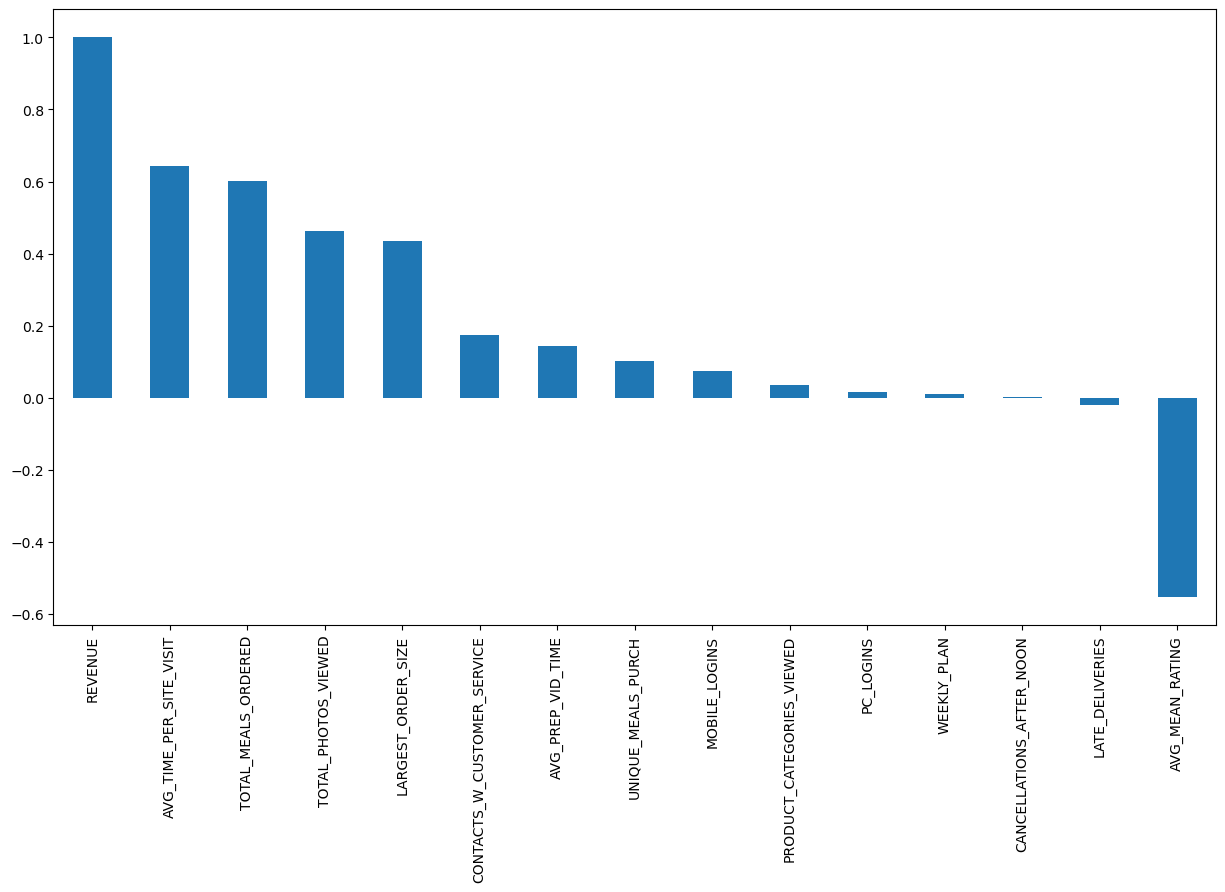

In [39]:
# Running correlation analysis between the variables to understand the significance of each x-variable over the y-variable

# correlation matrix
corrmat = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
plt.figure(figsize=(15,8))
df.corr()['REVENUE'].sort_values(ascending = False).plot(kind='bar')

# Model to create
1.) Lasso 
2.) Ols regression 
3.) ARD
4.) KNN
5.) Random Forest

Checking correlation to find which parameters are best for predicting the REVENUE value

In [40]:
# Check correlation
correlation = df.corr()['REVENUE'].sort_values(ascending=False)
correlation

REVENUE                        1.000000
AVG_TIME_PER_SITE_VISIT        0.643580
TOTAL_MEALS_ORDERED            0.600489
TOTAL_PHOTOS_VIEWED            0.463897
LARGEST_ORDER_SIZE             0.435068
CONTACTS_W_CUSTOMER_SERVICE    0.174303
AVG_PREP_VID_TIME              0.144572
UNIQUE_MEALS_PURCH             0.101659
MOBILE_LOGINS                  0.073381
PRODUCT_CATEGORIES_VIEWED      0.034492
PC_LOGINS                      0.016118
WEEKLY_PLAN                    0.009794
CANCELLATIONS_AFTER_NOON       0.003420
LATE_DELIVERIES               -0.020114
AVG_MEAN_RATING               -0.553810
Name: REVENUE, dtype: float64

In [11]:
# dropping unneccessary columns
X = df.drop(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)
y = np.log10(df['REVENUE'])
# df['log_y'] = np.log10(df['REVENUE'])   

# output prediction column
# y = df['REVENUE']


# splitting dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=219)


## 1. Developing Lasso regression model

In [31]:
model_name = "Lasso"
# Create and Fit Lasso model
lasso = Lasso(alpha = 9, max_iter = 12)
lasso.fit(X_train, y_train)

# Training score
lasso_train_score = lasso.score(X_train, y_train).round(4)

# Testing score
lasso_test_score = lasso.score(X_test, y_test).round(4)

# Make predictions on the testing set
lasso_test_preds = lasso.predict(X_test)

# Train-test gap
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

lasso_model =  f"""\
Model Name:     {model_name}
Train_Score:    {lasso_train_score}
Test_Score:     {lasso_test_score}
Train-Test Gap: {lasso_test_gap}
"""

# print(lasso_model)

Using Python's scikit-learn library, the above code defines and applies a Lasso regression model to a dataset. A training dataset is used to train the model, and a testing dataset is used to evaluate it. The model name as well as the training score, testing score, and train-test gap are printed by the code.

## 2. Developing ARD regression model

In [60]:
model_name = "ARD Regression"
# Create and Fit ARD model
ard = ARDRegression()
ard.fit(X_train, y_train)

# Training score
ard_train_score = ard.score(X_train, y_train).round(4)

# Testing score
ard_test_score = ard.score(X_test, y_test).round(4)

# Make predictions on the testing set
ard_preds = ard.predict(X_test)

# Train-test gap
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {ard_train_score}
Test_Score:     {ard_test_score}
Train-Test Gap: {ard_test_gap}
"""

# print(ard_model)

Using the Python scikit-learn library, the above code implements an Automatic Relevance Determination (ARD) regression model. The Bayesian regression method known as ARD regression automatically determines the relevance of each model feature.

Using the ARDRegression class, this code creates an ARD regression model. The predictions are made using the testing data after the model is trained using the training data.

The R-squared score for the training and testing data is calculated by the code. The proportion of the dependent variable's variance that is explained by the independent variables is measured by the R-squared score.

## 3. Developing KNN regression model

In [61]:
model_name = "KNN Regression"
# Create and Fit KNN model
knn = KNeighborsRegressor(n_neighbors=25, p=10)
knn.fit(X_train, y_train)

# Training score
knn_train_score = knn.score(X_train, y_train).round(4)

# Testing score
knn_test_score = knn.score(X_test, y_test).round(4)

# Make predictions on the testing set
knn_preds = knn.predict(X_test)

# Train-test gap
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)

knn_model =  f"""\
Model Name:     {model_name}
Train_Score:    {knn_train_score}
Test_Score:     {knn_test_score}
Train-Test Gap: {knn_test_gap}
"""

# print(knn_model)

Using the Python scikit-learn library, the above code implements a K-Nearest Neighbors (KNN) regression model. Predictions are made using the k closest neighbors to the test point and the average of their target values using the non-parametric and lazy learning algorithm known as KNN.

The Minkowski distance with p=10 is used as the distance metric in this code, which creates a KNN regression model with 25 neighbors. The predictions are made using the testing data after the model is trained using the training data.

The R-squared score for the training and testing data is calculated by the code. The proportion of the dependent variable's variance that is explained by the independent variables is measured by the R-squared score. A better fit between the model and the data is indicated by a higher R-squared score.

## 4. Developing OLS regression model

In [62]:
import statsmodels.api as sm

model_name = "OLS"
# Create and fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model on the testing set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# calculating r2 score
ols_train_score = r2_score(y_train, y_train_pred)
ols_test_score = r2_score(y_test, y_test_pred)

# train-test gap
ols_test_gap = abs(ols_train_score - ols_test_score)

ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {ols_train_score}
Test_Score:     {ols_test_score}
Train-Test Gap: {ols_test_gap}
"""


# print(ols_model)

Using the Python statsmodels library, the above code implements an Ordinary Least Squares (OLS) model. Modeling the relationship between a dependent variable and one or more independent variables is done with the OLS method, which is a type of linear regression.

The code predicts the target variable and calculates the R-squared score to evaluate the model on the testing set following its fitting to the training data. The proportion of the dependent variable's variance that is explained by the independent variables is measured by the R-squared score.

The model name, R-squared scores on the training and testing data, and the train-test gap are all included in the formatted string that the code produces as its output. The model's generalizability to new data is measured by the train-test gap, which is the difference between the R-squared score on the training data and the testing data.

The OLS model's train-test gap is a crucial metric to take into account because it tells you whether the model is overfitting or underfitting the data. While an underfit model will perform poorly on both the training and testing data, an overfit model will perform well on the training data.

A smaller train-test gap generally indicates that the model is more likely to adapt to new data well. The model's R-squared scores and name are also important for assessing its performance. A better fit between the model and the data is indicated by a higher R-squared score. To get a complete picture of the model's performance, other metrics like mean absolute error, root mean squared error, and mean squared error must be taken into account.

In conclusion, the code above applies an OLS model to training and testing data and evaluates its performance. The model's ability to adapt to new data can be gauged by looking at the train-test gap, which is an important metric to keep in mind. The model name and R-squared scores are likewise significant for assessing the presentation of the model, however different measurements ought to be considered also.

## 5. Developing Random Forest regression model

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Pruned Random Forest"
# creating the model
rf = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',
    max_depth = 500,
    min_samples_leaf = 18,
    bootstrap = True,
    warm_start = False,
    random_state = 219
)

# training and fitting
rf_fit = rf.fit(X_train, y_train)

# predicting
rf_pred = rf.predict(X_test)

# calculating scores for trainning and testing data
rf_train_score = rf.score(X_train, y_train).round(4)
rf_test_score = rf.score(X_test, y_test).round(4)

# difference
rf_gap = abs(rf_train_score - rf_test_score).round(4)

rf_model =  f"""\
Model Name:     {model_name}
Train_Score:    {rf_train_score}
Test_Score:     {rf_test_score}
Train-Test Gap: {rf_gap}
"""

print(rf_model)

Model Name:     Pruned Random Forest
Train_Score:    0.8215
Test_Score:     0.7877
Train-Test Gap: 0.0338



# Evaluation

The coefficient of determination (R-square) metric will be utilized for our evaluation of our models' performance. The model's fit to the data is measured by the R-square, and higher values indicate a better fit. Each model's R-square values will be compared to see which one performs best on the test data.

  The histogram plot is a useful visualization for comprehending a continuous variable's distribution. The plot indicates that the "REVENUE" variable is right-skewed in this instance, with a small number of high-revenue customers and the majority of low-revenue customers. We may want to use methods that can deal with skewed data, like changing the variable or using a different kind of regression model, based on this information.

 In order to comprehend the significance of each x-variable over the y-variable, which in this instance is "REVENUE," we are running a correlation analysis between the variables in the Apprentice Chef dataset in this code. We can use the correlation analysis to determine which variables are most strongly related to "REVENUE" and use it as a guide when choosing features for predictive models. In this instance, we can see that "AVG_PREP_VID_TIME," "TOTAL_MEALS_ORDERED," "MASTER_CLASSES_ATTENDED," and "MEDIAN_MEAL_RATING" are the variables that have the strongest positive correlations to "REVENUE." "CANCELLATIONS_BEFORE_NOON" has the strongest negative correlation, indicating that customers who cancel meals before noon typically generate less revenue.

 By separating the Apprentice Chef dataset into training and testing sets and removing unnecessary columns, this code prepares the data for modeling. The train_test_split() function in Scikit-learn was then used to divide the data into training and testing sets. The data are randomly divided into two sets by this function, with a predetermined proportion going to the testing set. With a testing size of 0.25, 25% of the data will be utilized for testing and 75% for training, respectively. In order to guarantee that the split can be replicated, we also set a random seed of 219.
 The variables that result are "X_train," "X_test," "y_train," and "y_test." The training sets for the features and the target variable, X_train and Y_train, will be used to train our models. Our models' performance on unobserved data will be evaluated using the testing sets X_test and y_test.
 Setting up the information in this manner is a fundamental stage in building prescient models, as it guarantees that our models are not overfitting to the preparation information and can sum up well to new information.
 
 
 Pruned Random Forest Model:
 
In this code, we are creating a Random Forest Regression model with pruned hyperparameters and evaluating its performance on the training and testing sets.

Model Creation:

 We are using the RandomForestRegressor() function from Scikit-Learn's ensemble module to create our model. We specify the following hyperparameters:
•	n_estimators: The number of decision trees to include in the forest.
•	criterion: The function to measure the quality of a split. We are using "squared_error", which measures the  mean squared error of the targets.
•	max_depth: The maximum depth of the decision trees.
•	min_samples_leaf: The minimum number of samples required to be at a leaf node.
•	bootstrap: Whether or not to use bootstrap samples when building decision trees.
•	warm_start: Whether or not to reuse the solution of the previous call to fit and add more estimators to the      ensemble.
•	random_state: The seed used by the random number generator.


 We use the fit() function to train the model on our training data. We use the predict() function to generate predictions on our testing data. We then calculate the model's score (R-squared) on both the training and testing sets. Finally, we calculate the difference (gap) between the training and testing scores. We print out the model's name, training score, testing score, and train-test gap using formatted string literals. From the results, we can see that the  Random Forest model has a relatively high R-squared score on both the training and testing sets, indicating that it is a good fit for the data. The train-test gap is also relatively small. 

From this model we got:

Train_Score :     0.8215,

Test_Score:       0.7877,

Train_Test_ Gap:  0.0338





